In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea
from scipy import stats
sea.set()

# TRANSFORMACION DE DATOS

In [2]:
inmuebles = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

DATOS NULOS

Las variables relevantes que cuentan con datos nulos son la cantidad de baños y las superficies totales y cubiertas.

In [3]:
print(inmuebles.isnull().sum(axis = 0))

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


SE ELIMINAN COLUMNAS QUE SE CONSIDERAN IRRELEVANTES

In [4]:
inmuebles1 = inmuebles.drop(columns=["lat", "lon", "operation_type","title", "description", "start_date", "end_date", "created_on", "currency", "property_type"], axis=1)

SE INSERTAN LOS DATOS FALTANTES POR LA MEDIA

In [5]:
inmuebles2 = inmuebles1.copy()
inmuebles2.fillna(inmuebles2.median(), inplace = True)

In [6]:
print(inmuebles2.isnull().sum(axis = 0))

l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64


In [7]:
inmuebles2

,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
1,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
4,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0
...,...,...,...,...,...,...,...,...,...
146655,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0
146656,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0
146657,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0
146658,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0


CAMBIAR LOS NOMBRES DE LAS COLUMNAS POR OTROS MAS FACILES DE INTERPRETAR

In [8]:
inmuebles2.rename(columns = {'l1':'PAIS', 'l2':'ZONA', 
                              'l3':'BARRIO', "property_type":"tipo de propiedad"}, inplace = True)

In [9]:
inmuebles2

,PAIS,ZONA,BARRIO,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
1,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
4,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0
...,...,...,...,...,...,...,...,...,...
146655,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0
146656,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0
146657,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0
146658,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0


In [10]:
pd.DataFrame.from_dict(inmuebles2)

,PAIS,ZONA,BARRIO,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0
1,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
4,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0
...,...,...,...,...,...,...,...,...,...
146655,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0
146656,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0
146657,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0
146658,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0


Los graficos a continuacion se realizan para verificar la presencia de datos que esten alejados de la media y que perjudiquen el entrenamiento del modelo

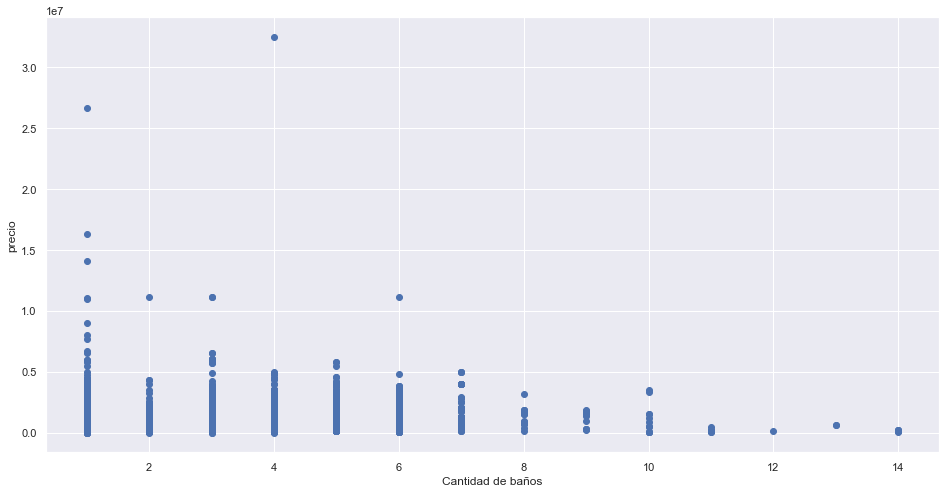

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(inmuebles2['bathrooms'], inmuebles2['price'])
ax.set_xlabel('Cantidad de baños')
ax.set_ylabel('precio')
plt.show()

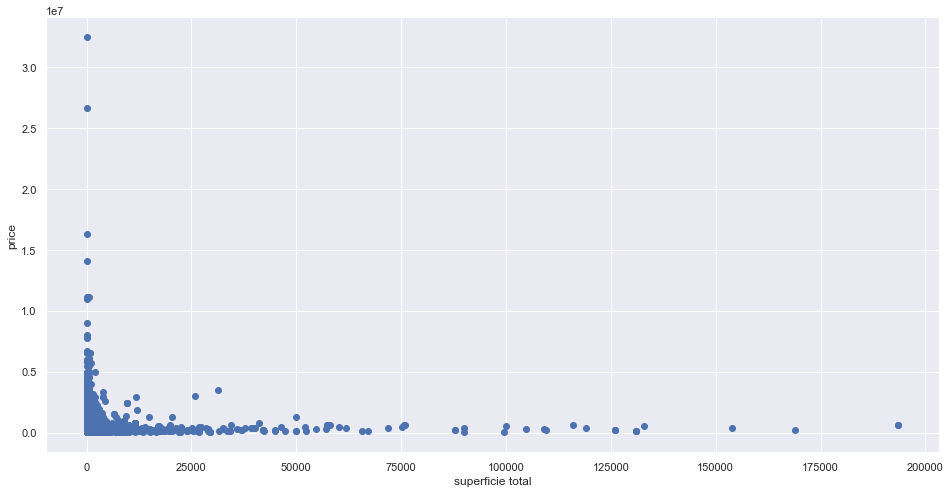

In [12]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(inmuebles2['surface_total'], inmuebles2['price'])
ax.set_xlabel('superficie total')
ax.set_ylabel('price')
plt.show()

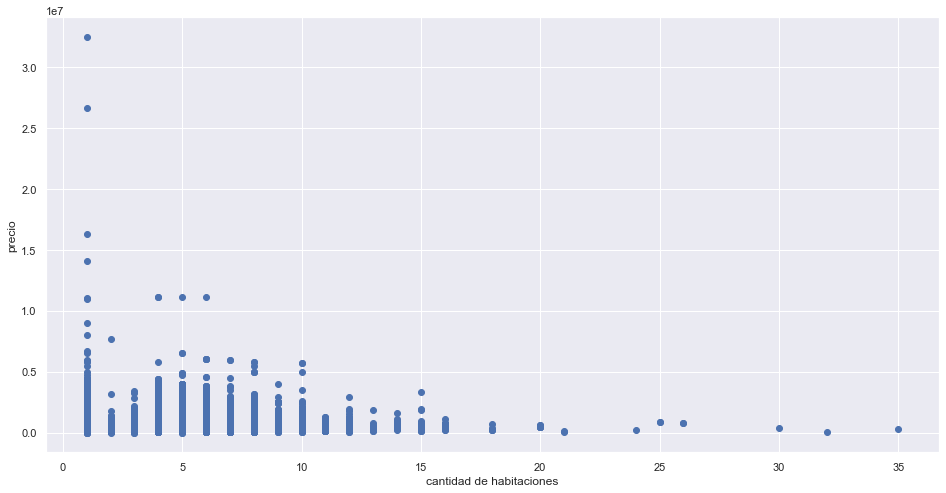

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(inmuebles2['rooms'], inmuebles2['price'])
ax.set_xlabel('cantidad de habitaciones')
ax.set_ylabel('precio')
plt.show()

In [14]:
inmuebles2.shape

(146660, 9)

ELIMINAR LOS DATOS ATIPICOS O LOS VALORES QUE EXCEDEN AL CUANTIL 1 Y 3

In [15]:
Q1 = inmuebles2.quantile(0.25)
Q3 = inmuebles2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rooms                   2.0
bedrooms                2.0
bathrooms               1.0
surface_total          68.0
surface_covered        48.0
price              154000.0
dtype: float64


In [16]:
inmuebles3 = inmuebles2[~((inmuebles2 < (Q1 - 1.5 * IQR)) |(inmuebles2 > (Q3 + 1.5 * IQR))).any(axis=1)]
inmuebles3.shape

(120363, 9)

Aplicacion de One Hot Encoder

In [17]:
cat = (inmuebles3.dtypes == 'object')
columnas_categoricas = list(cat[cat].index)

print("Categorical variables:")
print(columnas_categoricas)

Categorical variables:
['PAIS', 'ZONA', 'BARRIO']


 # Aplicar LABEL ENCODER

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
pd.options.mode.chained_assignment = None

In [21]:
Pais_codificado = le.fit_transform(inmuebles3.PAIS)

In [22]:
inmuebles3.PAIS = le.fit_transform(inmuebles3.PAIS)

In [23]:
inmuebles3.head()

,PAIS,ZONA,BARRIO,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,0,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,0,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,0,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
4,0,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0
5,0,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0


In [24]:
Zona_codificada = le.fit_transform(inmuebles3.ZONA)
inmuebles3.ZONA = le.fit_transform(inmuebles3.ZONA)
inmuebles3.head()

,PAIS,ZONA,BARRIO,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,0,3,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0
2,0,3,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0
3,0,3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0
4,0,2,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0
5,0,3,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0


In [25]:
barrio_codificado = le.fit_transform(inmuebles3.BARRIO)
inmuebles3.BARRIO = le.fit_transform(inmuebles3.BARRIO)
inmuebles3.head()

,PAIS,ZONA,BARRIO,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,0,3,11,2.0,1.0,2.0,70.0,58.0,159000.0
2,0,3,48,2.0,1.0,1.0,45.0,45.0,125000.0
3,0,3,48,2.0,1.0,1.0,85.0,50.0,295000.0
4,0,2,33,2.0,1.0,1.0,50.0,35.0,40000.0
5,0,3,76,2.0,1.0,1.0,56.0,56.0,150000.0


In [26]:
inmuebles3.head()

,PAIS,ZONA,BARRIO,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,0,3,11,2.0,1.0,2.0,70.0,58.0,159000.0
2,0,3,48,2.0,1.0,1.0,45.0,45.0,125000.0
3,0,3,48,2.0,1.0,1.0,85.0,50.0,295000.0
4,0,2,33,2.0,1.0,1.0,50.0,35.0,40000.0
5,0,3,76,2.0,1.0,1.0,56.0,56.0,150000.0


 #### El tratamiento de las variables categoricas indicadas se realiza mediante label encoding. Este metodo se utiliza para normalizar variables y transformar variables no numericas a numericas. Se realiza con las variables categoricas (PAIS, ZONA, BARRIO) en el que se asigna un valor numerico a cada instnacia distinta y se transforma la variable categorica en una numerica que facilite el desarrollo del modelo.

 # La base inmuebles3 contiene aquellas columnas relevantes, y no tiene valores faltantes o valores que excedan los cuantiles y ocasionen un sesgo en el modelo, ademas de las variables categoricas nornalizadas.

## DESARROLLO DEL MODELO DE ENTREGA 1

In [27]:
X1 = inmuebles3[['rooms', 'bedrooms', 'bathrooms']]
y1 = inmuebles3['price']

In [28]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [30]:
tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

In [31]:
tree_regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [32]:
print(tree_regressor.score(X1_train, y1_train))

0.42558520081257956


In [33]:
clf_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
clf_tree.fit(X1, y1)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [34]:
y1_train_pred = clf_tree.predict(X1_train)
y1_test_pred = clf_tree.predict(X1_test)

In [35]:
from sklearn.metrics import r2_score
r2_score(y1_train, y1_train_pred)

0.4205942406976132

No hay una mejora en el desempeño, ya que al adecuar la base se eliminaron filas y completaron espacios vacios con la media.
Entonces, el modelo obtenido con la base sin realizar preprocedimiento tiene mejor desempeño. Sin embargo, debemos destacar que en esa base existen valores nulos por lo que la informacion no es adecuada, asi como que cuenta con valores que estan fuera del rango que va del cuantil 1 al 3

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
inmuebles3.head()

,PAIS,ZONA,BARRIO,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,0,3,11,2.0,1.0,2.0,70.0,58.0,159000.0
2,0,3,48,2.0,1.0,1.0,45.0,45.0,125000.0
3,0,3,48,2.0,1.0,1.0,85.0,50.0,295000.0
4,0,2,33,2.0,1.0,1.0,50.0,35.0,40000.0
5,0,3,76,2.0,1.0,1.0,56.0,56.0,150000.0


In [38]:
inmuebles3.shape

(120363, 9)

Entrenamiento del modelo del proyecto 1, con la nueva base

In [39]:
X1 = inmuebles3[['rooms', 'bedrooms', 'bathrooms']]
y1 = inmuebles3['price']

In [40]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=0.3, random_state=1)

In [41]:
tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

In [42]:
tree_regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [43]:
#score del modelo de entrenamiento
print(tree_regressor.score(X1_train, y1_train))

0.42558520081257956


In [44]:
clf_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
clf_tree.fit(X1, y1)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [45]:
y1_train_pred = clf_tree.predict(X1_train)
y1_test_pred = clf_tree.predict(X1_test)

In [46]:
rmse_train = numpy.sqrt(mean_squared_error(y1_train, y1_train_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
rmse_test = numpy.sqrt(mean_squared_error(y1_test, y1_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_test}')

Raíz del error cuadrático medio en Train: 70027.40975323926
Raíz del error cuadrático medio en Train: 70542.93652058358


In [47]:
from sklearn.metrics import r2_score
r2_score(y1_train, y1_train_pred)

0.4205942406976132

Si bien se usan las mismas variables dependientes e independientes, la metrica obtenida luego de entrenar el modelo con la base de datos modificada arroja una menor cantidad de variabilidad de la variable dependiente explicada comparandolo con el desempeño del modelo entrenado en el proyecto 1, y con la base sin realizar modificaciones. Es por esto que podemos concluir que el modelo entrenado en el proyecto 1 tiene mejor desempeño al modelo entrenado en este proyecto, despues de realizar el preprocesamiento de la base.

# Se aplica una reduccion de dimensionalidad, para resumir la mayor cantidad de informacion posible  en la menor cantidad de atributos.
La reduccion de dimensionalidad la utilizamos para mejorar la eficiencia en los modelos, los tiempos, y para que ocupen menos espacio en la memoria (y puedan ejecutarse en una maquina menos potente).
Tambien la utilizamos para facilitar la visualizacion.
El metodo que utilizamos es SVD truncado, creando una nueva matriz a partir de la matriz original que tenga menos atributos y menos cantidad de columnas

In [48]:
from sklearn.decomposition import TruncatedSVD

In [49]:
svd = TruncatedSVD(2)

In [50]:
inmuebles3_transformed = svd.fit_transform(inmuebles3)

In [51]:
inmuebles3_transformed[:5]

array([[ 1.59000025e+05, -3.59416146e-03],
       [ 1.25000023e+05,  8.13034879e+00],
       [ 2.95000015e+05, -5.30380359e+01],
       [ 4.00000318e+04,  4.72011417e+01],
       [ 1.50000033e+05,  1.97212089e+01]])

# Definicion de las variables

### Las variables independientes son rooms, bedrooms y bathrooms, y la variable dependiente es el precio. 

In [52]:
X = inmuebles3[['rooms', 'bedrooms', 'bathrooms']]
y = inmuebles3['price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [55]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

El escalado de datos le da la misma media y distancia de cada instancia a la media a todas las variables. Se utiliza para los modelos de boosting y randomforest

El objetivo del modelo es entrenar sucesivamente modelos debiles, combinando sus resultados y obtener uno mas fuerte.

In [56]:
from sklearn.model_selection import cross_validate

# Modelo I - BOOSTING

In [57]:
from sklearn.ensemble import AdaBoostRegressor

In [58]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=20)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  n_estimators=20)

In [59]:
score_vc = cross_validate(ada_clf, X_train, y_train, scoring=('r2', 'neg_mean_absolute_error'), cv=5,
return_train_score=True )

La validacion cruzada se realiza para garantizar que los datos obtenidos son independientes de la particion elegida entre entrenamiento y prueba del set. La cantidad de folds o de divisiones entre entrenamiento-prueba es la estandar, que es 5.

In [60]:
eam_trainset = abs(numpy.mean(score_vc['train_neg_mean_absolute_error']))
eam_testset = abs(numpy.mean(score_vc['test_neg_mean_absolute_error']))
print('Error absoluto medio sobre train:', eam_trainset)
print('Error absoluto medio sobre test',eam_testset)

Error absoluto medio sobre train: 57722.364312591075
Error absoluto medio sobre test 57750.41860040219


In [61]:
y1_train_pred = ada_clf.predict(X_train)
y1_test_pred = ada_clf.predict(X_test)

In [62]:
from sklearn.metrics import r2_score
r2_score(y_train, y1_train_pred)

0.37006241142281027

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y1_test_pred)

0.3694493232916948

En este modelo se utiliza Adaboost, cuya funcion es mejorar iterativamente el algoritmo base (arbol de decision en este caso), utilizando como referencia los casos clasificados incorrectamente en el conjunto de entrenamiento. El parametro n_estimators indica el numero de estimadores en el cual el boosting se detiene. En este caso  dicho estimador es de 20. El coeficiente de determinacion obtenido para el set de train y el set de test indica que el 36% de la variacion de la variable dependiente puede ser explicado por el modelo.
En relacion al modelo entrenado anteriormente este es menor por lo que el modelo no explica mayor cantidad de variabilidad.

# MODELO II - Random forest

Se utiliza este estimador que entrena arboles de decision para distintas submuestras, y calcula un promedio de los resultados obtenidos para asi mejorar los estimadores. La cantidad de arboles a entrenar en el arbol es de 3, para agilizar el proceso y debido a la capacidad limitada del procesador de la maquina

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
randomforest = RandomForestRegressor(n_estimators=3, max_features='sqrt', n_jobs= -1, oob_score = True, random_state = 42)
randomforest.fit(X_train, y_train)
#n_estimators = numero de arboles 
#max features = numero de instancias a considerar
#n jobs = numero de arboles generados en paralelo

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(max_features='sqrt', n_estimators=3, n_jobs=-1,
                      oob_score=True, random_state=42)

In [123]:
score_rf = cross_validate(randomforest, X_train, y_train.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), cv=5, return_train_score=True )

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees

La validacion cruzada se realiza para garantizar que los datos obtenidos son independientes de la particion elegida entre entrenamiento y prueba del set. La cantidad de folds o de divisiones entre entrenamiento-prueba es la estandar, que es 5.

In [124]:
eam_trainset = abs(numpy.mean(score_rf['train_neg_mean_absolute_error']))
eam_testset = abs(numpy.mean(score_rf['test_neg_mean_absolute_error']))
print('Error absoluto medio sobre train:', eam_trainset)
print('Error absoluto medio sobre test',eam_testset)

Error absoluto medio sobre train: 51697.45465721034
Error absoluto medio sobre test 51805.90267715724


In [125]:
y2_train_pred = randomforest.predict(X_train)
y2_test_pred = randomforest.predict(X_test)

In [147]:
from sklearn.metrics import r2_score
r2_score(y_train, y2_train_pred)

0.43102258844336205

# MODELO III - Vecinos mas cercanos

In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
Knn = KNeighborsRegressor(n_neighbors=8, weights="distance")
Knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8, weights='distance')

In [66]:
score_kn = cross_validate(Knn, X_train, y_train.values.ravel(), scoring=('r2', 'neg_mean_absolute_error'), 
                          cv=5, return_train_score=True )

In [67]:
eam_trainset = abs(numpy.mean(score_kn['train_neg_mean_absolute_error']))
eam_testset = abs(numpy.mean(score_kn['test_neg_mean_absolute_error']))
print('Error absoluto medio sobre train:', eam_trainset)
print('Error absoluto medio sobre test',eam_testset)

Error absoluto medio sobre train: 54041.67866571645
Error absoluto medio sobre test 54242.37169990791


In [68]:
y3_train_pred = Knn.predict(X_train)
y3_test_pred = Knn.predict(X_test)

In [69]:
from sklearn.metrics import r2_score
r2_score(y_train, y3_train_pred)

0.3832298352025366

En primer instancia, se detectaron los valores atipicos asi como los valores faltantes dentro del dataset. Para realizar el entrenamiento de los modelos correctamente, se eliminaron los valores atipicos y se completaron los valores faltantes utilizanod la media.
Al entrenar el modelo con la nueva base, los resultados obtenidos varian y el porcentaje de variabilidad cae, es decir que el modelo con la base y los datos transformados es menos eficiente que el modelo con la base anterior.
En segundo lugar, se realiza un modelo de boosting, que combina los resultados de muchos arboles de decision para aumentar la calidad del modelo y la capacidad de prediccion. El resultado obtenido es 0,36, que lo convierte en un modelo menos eficiente. Lo mismo ocurre con el  modelo random forest. De los modelos entrenados, el que mejor desempeño tiene es el arbol de decision, pero al compararlo con el modelo entrenado en el proyecto 1, tiene peor desempeño.

# IMPORTANCIA DE LAS VARIABLES DENTRO DEL MODELO BOOSTING

In [88]:
feature=ada_clf.feature_importances_
features=pd.DataFrame(data=feature)
columnas=X.columns
variables_importantes=pd.DataFrame(data=features.values,index=columnas,columns=['importance'])
variables_importantes.sort_values('importance')
variables_importantes.head()

,importance
rooms,0.145854
bedrooms,0.051233
bathrooms,0.802913


# EVALUACION DE LOS ERRORES

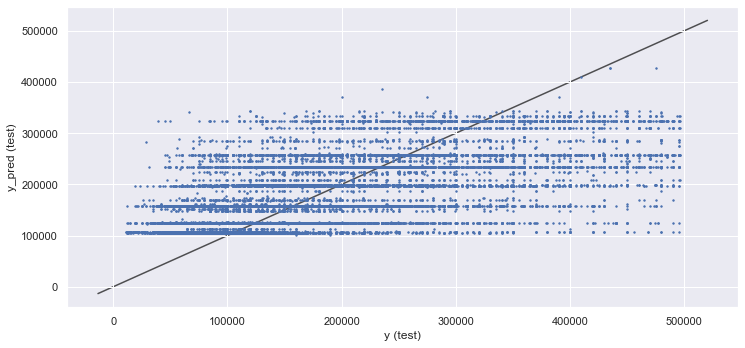

In [149]:
plt.figure(figsize = (20,5))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y2_test_pred, s =2)
    
lims = [
    numpy.min([ax.get_xlim(), ax.get_ylim()]),
    numpy.max([ax.get_xlim(), ax.get_ylim()])]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

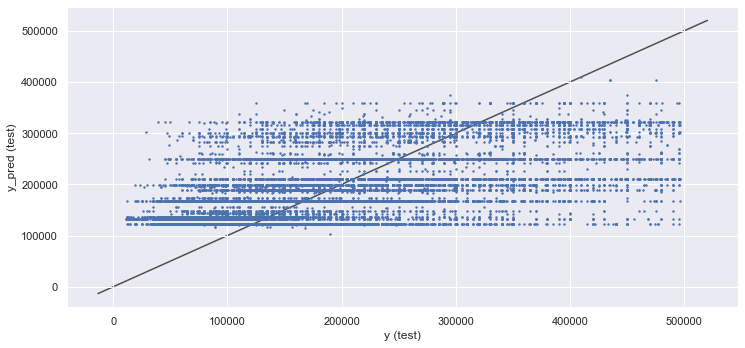

In [150]:
plt.figure(figsize = (20,5))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y3_test_pred, s =2)
    
lims = [
    numpy.min([ax.get_xlim(), ax.get_ylim()]),
    numpy.max([ax.get_xlim(), ax.get_ylim()])]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

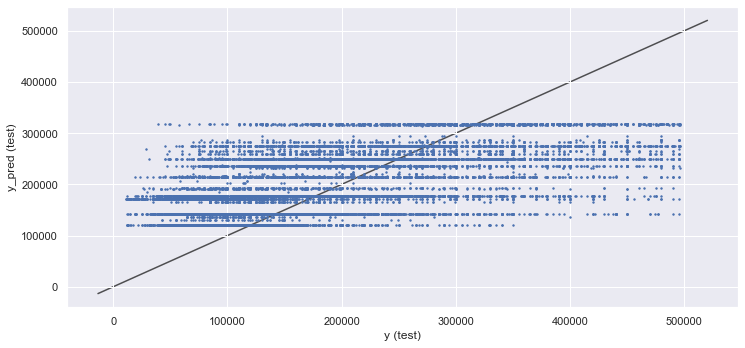

In [151]:
plt.figure(figsize = (20,5))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y1_test_pred, s =2)
    
lims = [
    numpy.min([ax.get_xlim(), ax.get_ylim()]),
    numpy.max([ax.get_xlim(), ax.get_ylim()])]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Los modelos vecinos mas cercanos y randomforest tienen mayor capacidad de predecir las instancias con precios mayores, mientras que el modelo 1 tiene mas dificultad para predecir las instancias con precios superiores a 400000. 

# Criticas a la metodologia utilizada

La principal critica es la gran cantidad de capacidad que es necesaria para desarrollar los modelos, sobre todo el modelo RandomForest. Sui bien el desempeño mejora al realisar SDV, el modelo mejora Ademas Teniendo en cuenta que es un metodo iterativo, para poder correr el codigo se requiere de una gran cantidad de memoria ram y de velocidad en el microprocesador. 